In [1]:
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate as integrate

In [2]:
%matplotlib inline

In [204]:
def constrained_planar_SHO_polar(state,t,m,k,w,l):
    r         = state[0]
    r_dot     = state[1]
    w0_sqr    = k/m
    return np.array([r_dot,-(w0_sqr-w**2)*r])

In [205]:
def E_and_L_polar(eph,m,k,w,l):
    num_points = len(eph)
    conserved  = np.zeros((num_points,2))
    
    index = 0
    for record in eph:
        r                  = record[0]
        r_dot              = record[1]
        T                  = 0.5*m*(r_dot**2 + r**2*w**2)
        V                  = 0.5*k*r**2
        conserved[index,0] = T + V
        conserved[index,1] = 0.5*m*r_dot**2 + 0.5*(k/m - w**2)*r**2
        index              = index + 1
        
    return conserved

In [237]:
m     = 1.0
k     = 2.0
w     = np.sqrt(k/m) - 0.1
l     = 4.0
parms = {'k':k,'m':m}

In [238]:
R        = 2.4
S0_polar = np.array([R,0.0])

In [239]:
period    = 2*np.pi/np.sqrt(np.abs(w**2 - k/m))
print period
time_span = np.arange(0.0,2*period,0.1)

12.0288383639


In [240]:
eph_polar = integrate.odeint(constrained_planar_SHO_polar,S0_polar,time_span,args=(m,k,w,l))

In [241]:
conserved_polar = E_and_L_polar(eph_polar,m,k,w,l)

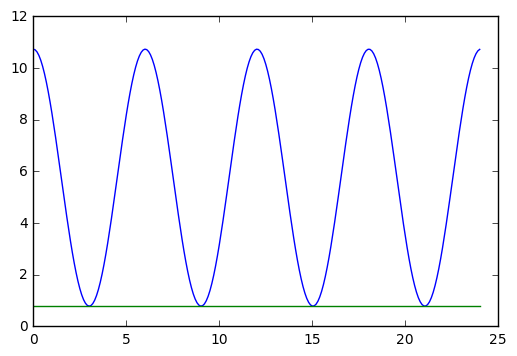

In [242]:
plt.plot(time_span,conserved_polar)

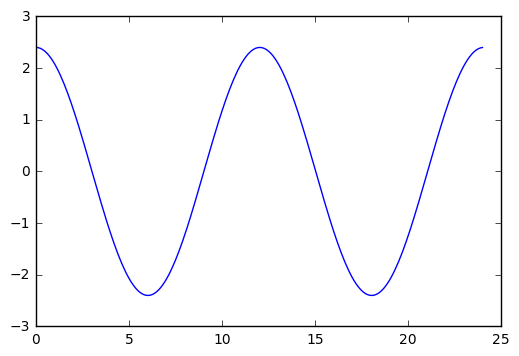

In [243]:
plt.plot(time_span,eph_polar[:,0])